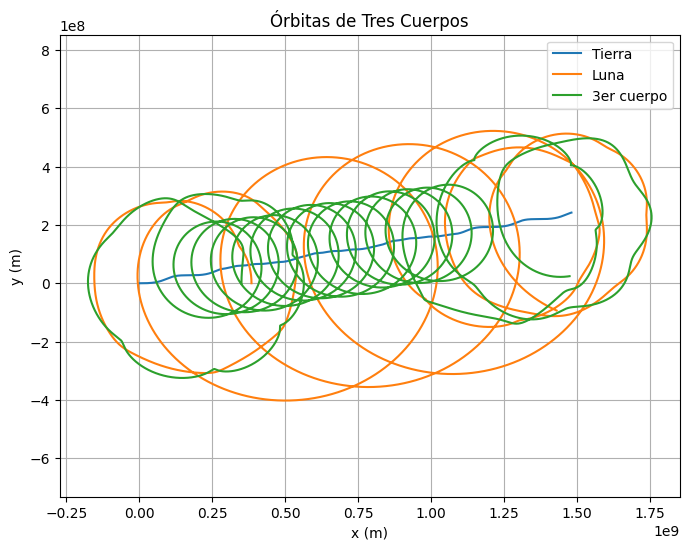

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 6.67430*10**(-11)  # Gravitational constant
dt = 100  #

# Definiendo masas
m1 = 5.972e24  # Masa de la Tierra en kg
m2 = 7.342e22  # Masa de la Luna en kg
m3 = 3e22   # Masa del 3er cuerpo en kg

# Posiciones y velocidades iniciales
r1 = np.array([0.0, 0.0])
r2 = np.array([384400e3, 0.0])  # Distancia Tierra-Luna
r3 = np.array([350000e3,0.0])      # Distancia desde Tierra

v1 = np.array([100.0, 0.0])   # Velocidad Orbital Tierra
v2 = np.array([0.0, 1022.0])  # Velocidad Orbital Luna

v3 = np.array([0.0, 700.0])  # Velocidad Inicial del 3er cuerpo

# Funciones para calcular aceleracion debido a la gravedad
def acceleration(r1, r2, m2):
    r = r2 - r1
    return G * m2 / np.linalg.norm(r)**3 * r

# Loop de Simulación
steps = 150000
positions1 = np.zeros((steps, 2))
positions2 = np.zeros((steps, 2))
positions3 = np.zeros((steps, 2))

for i in range(steps):
    # Calculando aceleraciones
    a1 = acceleration(r1, r2, m2) + acceleration(r1, r3, m3)
    a2 = acceleration(r2, r1, m1) + acceleration(r2, r3, m3)
    a3 = acceleration(r3, r1, m1) + acceleration(r3, r2, m2)

    # Cálculo de Velocidades
    v1 += a1 * dt
    v2 += a2 * dt
    v3 += a3 * dt

    # Cálculo de Posiciones
    r1 += v1 * dt
    r2 += v2 * dt
    r3 += v3 * dt

    # Almacenamiento de posiciones para graficar
    positions1[i] = r1
    positions2[i] = r2
    positions3[i] = r3

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(positions1[:, 0], positions1[:, 1], label='Tierra')
plt.plot(positions2[:, 0], positions2[:, 1], label='Luna')
plt.plot(positions3[:, 0], positions3[:, 1], label='3er cuerpo')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Órbitas de Tres Cuerpos')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()